<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/%EB%B0%A9%ED%95%99%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 데이터 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

## **2. 데이터 파악**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28462 non-null  int64  
 1   V1      28462 non-null  float64
 2   V2      28462 non-null  float64
 3   V3      28462 non-null  float64
 4   V4      28462 non-null  float64
 5   V5      28462 non-null  float64
 6   V6      28462 non-null  float64
 7   V7      28462 non-null  float64
 8   V8      28462 non-null  float64
 9   V9      28462 non-null  float64
 10  V10     28462 non-null  float64
 11  V11     28462 non-null  float64
 12  V12     28462 non-null  float64
 13  V13     28462 non-null  float64
 14  V14     28462 non-null  float64
 15  V15     28462 non-null  float64
 16  V16     28462 non-null  float64
 17  V17     28462 non-null  float64
 18  V18     28462 non-null  float64
 19  V19     28462 non-null  float64
 20  V20     28462 non-null  float64
 21  V21     28462 non-null  float64
 22

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142503 entries, 0 to 142502
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      142503 non-null  object 
 1   V1      142503 non-null  float64
 2   V2      142503 non-null  float64
 3   V3      142503 non-null  float64
 4   V4      142503 non-null  float64
 5   V5      142503 non-null  float64
 6   V6      142503 non-null  float64
 7   V7      142503 non-null  float64
 8   V8      142503 non-null  float64
 9   V9      142503 non-null  float64
 10  V10     142503 non-null  float64
 11  V11     142503 non-null  float64
 12  V12     142503 non-null  float64
 13  V13     142503 non-null  float64
 14  V14     142503 non-null  float64
 15  V15     142503 non-null  float64
 16  V16     142503 non-null  float64
 17  V17     142503 non-null  float64
 18  V18     142503 non-null  float64
 19  V19     142503 non-null  float64
 20  V20     142503 non-null  float64
 21  V21     14

- 결측치 x, ID 변수(train, val에서는 int/ test에서는 object)를 제외하고 모두 float형
- valid 세트의 Class 변수: 0은 정상거래, 1은 사기 거래
- train 세트에는 라벨 값이 x, valid 세트에는 라벨 값 o 
> **train세트에서 비지도학습 실행 후 val세트로 모델 성능 확인, test세트에 모델 적용 후 예측**

## **3. 데이터 분포 확인**

In [ ]:
rate = val['Class'].value_counts()[1]/28462
print(rate)

0.0010540369615627855


- 사기 거래인 경우는 전체 거래의 약 0.105%로 불균형한 분포를 보임
> **오버샘플링 고려 필요**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8956ec9940>,
      dtype=object)

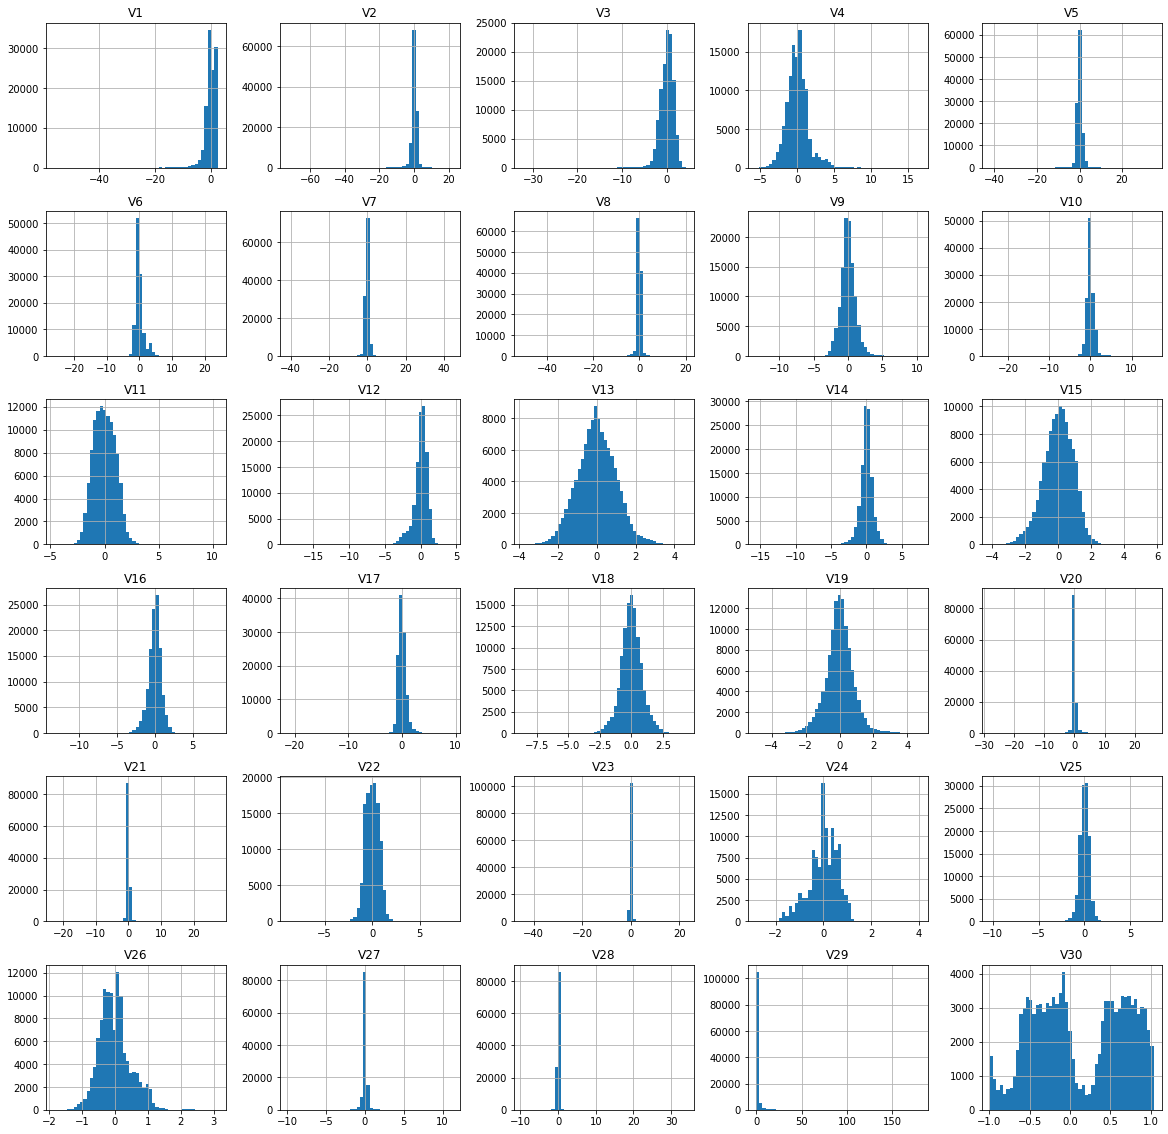

In [ ]:
train.drop(columns=['ID'],axis=1).hist(bins=50, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895561d250>,
      dtype=object)

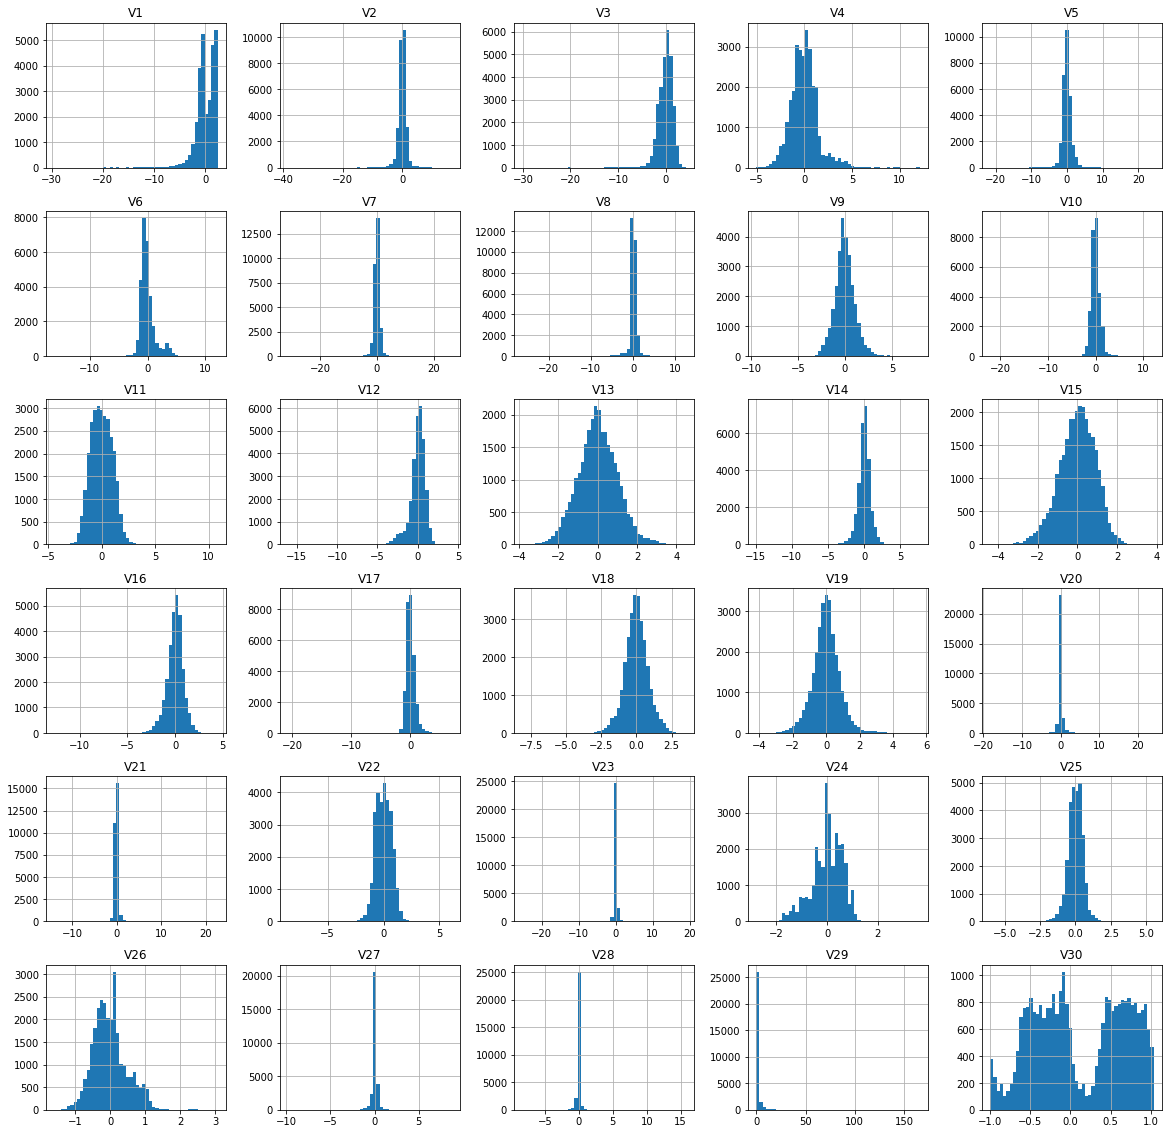

In [ ]:
val.drop(columns=['ID','Class'],axis=1).hist(bins=50, figsize=(20,20))

- train, val 세트 ID, Class를 제외한 변수의 분포가 전체적으로 비슷 
> train세트의 사기 거래 비율도 val 세트와 같은 0.105%라고 가정하고 비지도학습 수행

- 사용 모델
  - isolationforest: 결정 트리 기반인데 분류 목적이 아니라 이상치 분류가 목적
  - autoencoder
  - mcd 라벨링
  - KNN..?

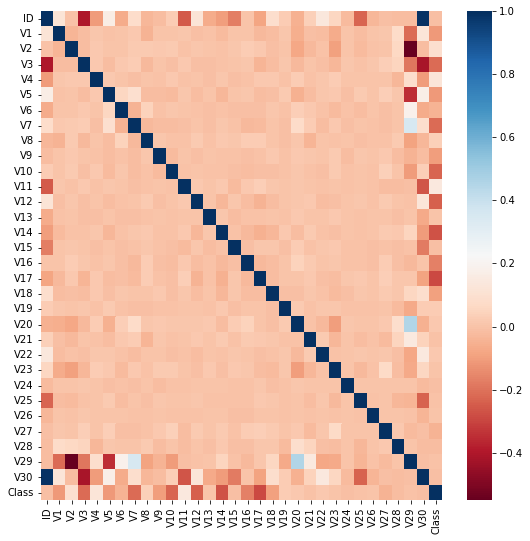

In [ ]:
plt.figure(figsize=(9, 9))
corr = val.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
val.corr()['Class'].sort_values()

V17     -0.290434
V14     -0.270852
V12     -0.239264
V10     -0.226813
V7      -0.214810
V3      -0.212345
V16     -0.169542
V5      -0.112254
V1      -0.109284
V9      -0.098666
V18     -0.096104
V6      -0.045676
V27     -0.043127
V28     -0.018156
V30     -0.010476
V24     -0.010131
V15     -0.009532
ID      -0.008435
V25     -0.003573
V29     -0.001762
V21     -0.001090
V13      0.001800
V23      0.005015
V26      0.005371
V20      0.015873
V22      0.016996
V19      0.024223
V8       0.038359
V2       0.096823
V4       0.126146
V11      0.142082
Class    1.000000
Name: Class, dtype: float64

- V3, V7, V10, V12, V14, V16, V17 피처가 Class와 음의 상관관계가 높음

## **4. 분류 모델 생성**

- IsolationForest
- autoencoder
- MissForest
- ellipticenvelope

### 4.1 IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
train_1 = train.drop(columns='ID')

In [ ]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [ ]:
model_1 = IsolationForest(n_estimators=200, max_features=30, max_samples=80000, contamination=rate, random_state=0)
model_1.fit(train_1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0010540369615627855, max_features=30,
                max_samples=80000, n_estimators=200, random_state=0)

In [ ]:
val_x = val.drop(columns=['ID','Class'])
val_y = val.Class

pred_1 = model_1.predict(val_x)
pred_1 = get_pred_label(pred_1)
score_1 = f1_score(val_y, pred_1, average='macro')
print(score_1)
print(classification_report(val_y,pred_1))

0.7140043609762959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.46      0.40      0.43        30

    accuracy                           1.00     28462
   macro avg       0.73      0.70      0.71     28462
weighted avg       1.00      1.00      1.00     28462



In [ ]:
train_2 = train[['V1','V3','V5','V7','V9','V10','V12','V14','V16','V17','V18']]
model_2 = IsolationForest(n_estimators=125, max_samples=len(train_2), contamination=rate, random_state=0)
model_2.fit(train_2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0010540369615627855, max_samples=113842,
                n_estimators=125, random_state=0)

In [ ]:
val_2 = val[['V1','V3','V5','V7','V9','V10','V12','V14','V16','V17','V18']]
val_y = val.Class

pred_2 = model_2.predict(val_2)
pred_2 = get_pred_label(pred_2)
score_2 = f1_score(val_y, pred_2, average='macro')
print(score_2)
print(classification_report(val_y,pred_2))

0.7804819432476949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.59      0.53      0.56        30

    accuracy                           1.00     28462
   macro avg       0.80      0.77      0.78     28462
weighted avg       1.00      1.00      1.00     28462



In [ ]:
test_1 = test[['V1','V3','V5','V7','V9','V10','V12','V14','V16','V17','V18']]

test_pred_1 = model_2.predict(test_1)
test_pred_1 = get_pred_label(test_pred_1)

In [ ]:
pred_y = get_pred_label(test_pred_1)
sub['Class'] = pred_y
sub.to_csv('./submit_IF.csv', index=False)

- 리더보드 결과: 0.75938898985

### 4.2 Auto Encoder

In [ ]:
# auto encoder 모델 생성을 위한 패키지 로드
import random
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import f1_score

In [ ]:
# 하이퍼 파라미터 변수 설정
epochs = 400
lr = 0.01
bs = 16384 # batch size 2의 제곱승꼴
seed = 41 # random seed

In [ ]:
len(train)

113842

In [ ]:
# random seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(seed) # Seed 고정

In [ ]:
# dataset 생성

class MyDataset(Dataset):
  def __init__(self, df, eval_mode):
    self.df = df
    self.eval_mode = eval_mode
    if self.eval_mode: # valid dataset의 경우 레이블 분리함
      self.labels = self.df['Class'].values
      self.df = self.df.drop(columns=['Class']).values
    else:
      self.df = self.df.values
      
  def __getitem__(self, index):
    if self.eval_mode:
      self.x = self.df[index]
      self.y = self.labels[index]
      return torch.Tensor(self.x), self.y
    else:
      self.x = self.df[index]
      return torch.Tensor(self.x)
  
  def __len__(self):
    return len(self.df)

In [ ]:
train_df = train.drop(columns=out, axis=1)
val_df = valid.drop(columns=out, axis=1)

train_dataset = MyDataset(df=train_df, eval_mode=False)
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)

val_dataset = MyDataset(df=val_df, eval_mode=True)
val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=True)

In [ ]:
train_df.shape

(113842, 15)

+ leaky relu [설명 링크](https://seongkyun.github.io/study/2019/05/01/activations/)

In [ ]:
# 1D auto encoder 모델 정의
# BatchNorm1d: 각 레이어마다 Normalization을 하는 레이어를 두어, 변형된 분포가 나오지 않도록 하는 것
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.Encoder = nn.Sequential(
        nn.Linear(15,64),
        nn.BatchNorm1d(64), 
        nn.LeakyReLU(),
        nn.Linear(64,128),
        nn.BatchNorm1d(128),
        nn.LeakyReLU(),
    )
    self.Decoder = nn.Sequential(
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.LeakyReLU(),
        nn.Linear(64,15),
    )
  def forward(self, x):
    x = self.Encoder(x)
    x = self.Decoder(x)
    return x

In [ ]:
# 학습 클래스 정의

class Trainer():
  def __init__(self, model, optimizer, train_loader, val_loader, scheduler):
    self.model = model
    self.optimizer = optimizer
    self.train_loader = train_loader
    self.val_loader = val_loader
    self.scheduler = scheduler
    self.criterion = nn.L1Loss() # loss function

  def fit(self, ):
    self.model
    best_score = 0
    for epoch in range(epochs):
      self.model.train()
      train_loss = []
      for x in iter(self.train_loader):
        x = x.float()
        self.optimizer.zero_grad()

        _x = self.model(x)
        loss = self.criterion(x, _x)

        loss.backward() #미분
        self.optimizer.step() #update

        train_loss.append(loss.item())

      score = self.validation(self.model, 0.95)
      print(f'Epoch: [{epoch}] Train loss : [{np.mean(train_loss)}] Val Score : [{score}]')

      if self.scheduler is not None:
        self.scheduler.step(score)
      
      if best_score < score:
        best_score = score
        torch.save(model.module.state_dict(), '/content/drive/MyDrive/best_model.pth', _use_new_zipfile_serialization=False)
  
  def validation(self, eval_model, thr):
    cos = nn.CosineSimilarity(dim=1, eps=1e-6)
    eval_model.eval()
    pred = []
    true = []
    with torch.no_grad():
      for x, y in iter(self.val_loader):
        x = x.float()
        
        _x = self.model(x)
        diff = cos(x,_x).tolist()
        batch_pred = np.where(np.array(diff)<thr, 1, 0).tolist()
        pred += batch_pred
        true += y.tolist()
    return f1_score(true, pred, average='macro')


In [ ]:
# 모델 학습

model = nn.DataParallel(AutoEncoder())
model.eval()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10, threshold_mode='abs', min_lr=1e-8, verbose=True)

trainer = Trainer(model, optimizer, train_loader, val_loader, scheduler)
trainer.fit()

Epoch: [0] Train loss : [0.5728985284055982] Val Score : [0.11682880221662134]
Epoch: [1] Train loss : [0.2949697460447039] Val Score : [0.41824831732223255]
Epoch: [2] Train loss : [0.1928330021245139] Val Score : [0.49628240378476274]
Epoch: [3] Train loss : [0.14757204268659865] Val Score : [0.5903004521016563]
Epoch: [4] Train loss : [0.12040246278047562] Val Score : [0.664673406571051]
Epoch: [5] Train loss : [0.10507303050586156] Val Score : [0.7600119366040216]
Epoch: [6] Train loss : [0.09748044929334096] Val Score : [0.8244378451249526]
Epoch: [7] Train loss : [0.08921833442790168] Val Score : [0.856966968023358]
Epoch: [8] Train loss : [0.08670207858085632] Val Score : [0.8621517488551477]
Epoch: [9] Train loss : [0.08518996089696884] Val Score : [0.8674887641844412]
Epoch: [10] Train loss : [0.08034385527883257] Val Score : [0.890501890608512]
Epoch: [11] Train loss : [0.07742508394377572] Val Score : [0.890501890608512]
Epoch: [12] Train loss : [0.07380256056785583] Val Sco

In [ ]:
# 추론
model = AutoEncoder()
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth'))
model = nn.DataParallel(model)
model.eval()

DataParallel(
  (module): AutoEncoder(
    (Encoder): Sequential(
      (0): Linear(in_features=15, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=64, out_features=128, bias=True)
      (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
    (Decoder): Sequential(
      (0): Linear(in_features=128, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=64, out_features=15, bias=True)
    )
  )
)

In [ ]:
test_df = test.drop(columns=out, axis=1)
test_dataset = MyDataset(test_df, False)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

In [ ]:
def prediction(model, thr, test_loader):
  model.eval()
  cos = nn.CosineSimilarity(dim=1, eps=1e-6)
  pred = []
  pred_x = []
  with torch.no_grad():
    for x in iter(test_loader):
      x = x.float()
      _x = model(x)
      pred_x += _x
      diff = cos(x,_x)
      batch_pred = np.where(np.array(diff)<thr, 1, 0).tolist()
      pred += batch_pred
  return pred, pred_x

In [ ]:
preds = prediction(model, 0.95, test_loader)[0]

In [ ]:
pred_x = prediction(model, 0.95, test_loader)[1]

In [ ]:
test_df.shape

(142503, 15)

In [ ]:
pred_x.shape

(142503, 15)

In [ ]:
temporary = []
for i in pred_x:
  temporary.append(i.numpy()) 

In [ ]:
include = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

In [ ]:
pred_x = pd.DataFrame(temporary, columns=include)
pred_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.354907,0.064657,2.605221,1.410151,-0.284926,0.337080,0.214190,0.390209,-0.017822,-0.555957,-0.689599,-0.288487,-0.456112,0.304916,0.062446
1,1.220309,0.306104,0.155470,0.511169,0.069476,-0.075137,-0.080593,-0.309888,-0.120876,1.648153,1.090022,-0.202879,0.476918,-0.062148,-0.251622
2,-1.217363,1.174643,1.602286,0.309923,-0.312562,0.002962,0.550840,0.849923,0.832397,-0.768666,0.503343,-1.160275,-0.485738,-0.420452,-0.003613
3,1.229584,0.129740,-0.032614,1.271641,0.205644,0.221936,-0.002109,0.471106,-0.048010,-1.517837,-0.191023,0.216567,-0.361948,0.019168,-0.672597
4,0.443388,0.813773,-0.902780,-0.050237,3.056902,3.410441,0.575579,-0.538614,0.348785,-0.318842,-0.341401,0.425990,-0.164280,-0.889511,0.301181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,0.276984,0.975519,-0.629912,0.973357,-0.082915,-0.979596,0.394010,-0.322856,-0.117671,-1.121396,-0.571215,1.177830,-1.561721,0.836653,-0.021393
142499,-1.719604,0.333571,1.023666,0.264656,1.252079,5.494387,-1.474717,1.199621,-0.533372,-1.386042,0.511660,-0.837966,-0.720828,0.335999,0.379286
142500,-0.838483,0.113048,2.030441,-0.764760,0.882648,0.965756,0.169956,0.604237,-0.973781,-0.226548,0.953582,-0.751945,-0.664877,-0.015665,-1.312560
142501,2.069576,-0.200630,-3.451433,-0.544553,2.769850,2.975472,-0.259981,0.452022,-0.454271,0.368375,-0.012077,-0.515884,0.154464,0.349491,0.411190


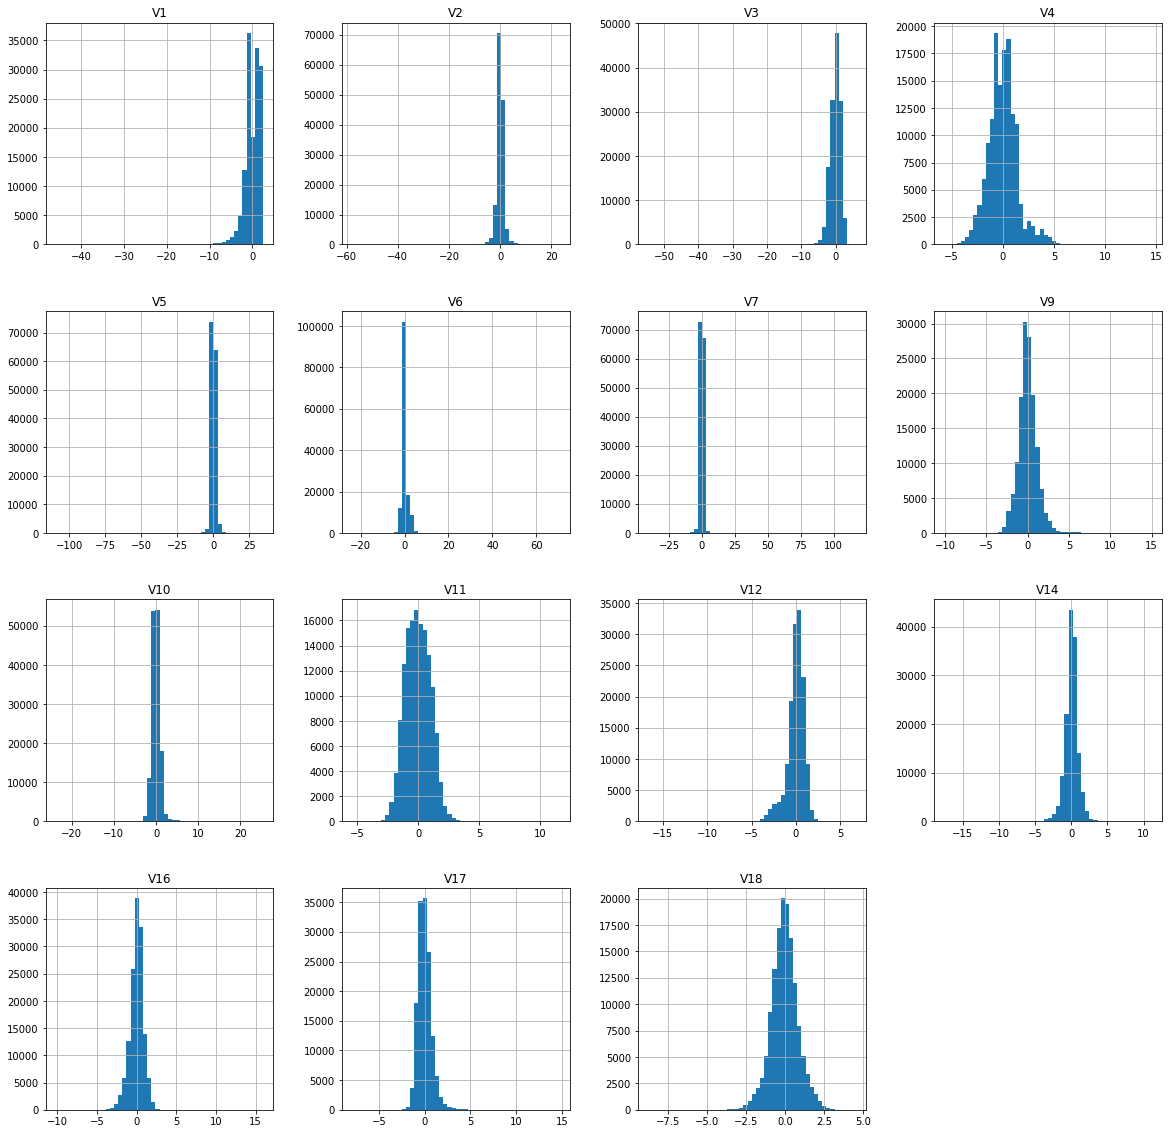

In [ ]:
pred_x.hist(bins=50, figsize=(20,20))
plt.show()

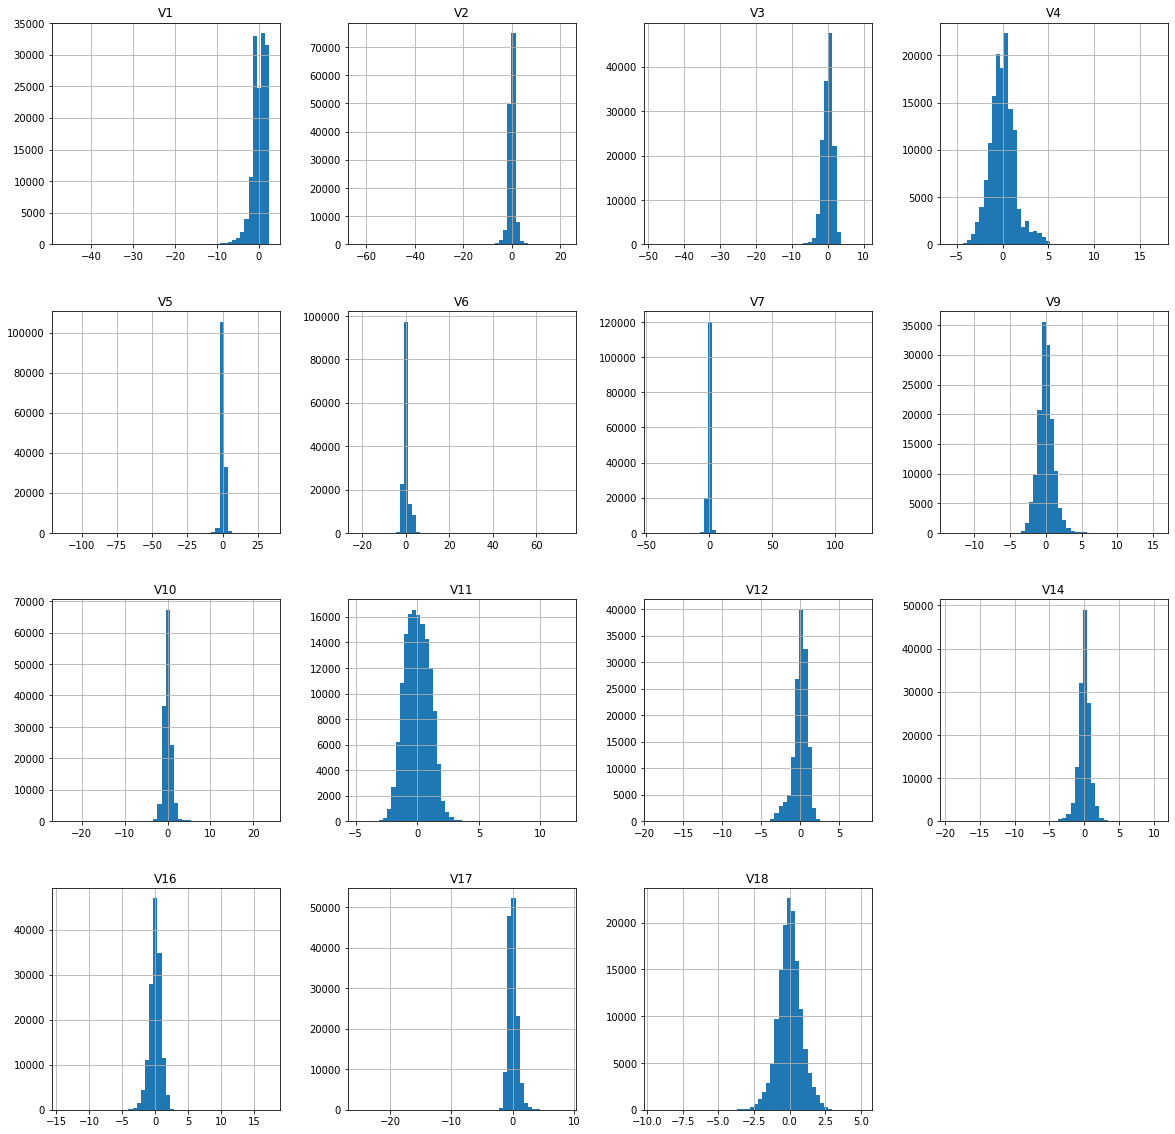

In [ ]:
test_df.hist(bins=50, figsize=(20,20))
plt.show()

+ normalizing scale 적용 후 auto encoding

In [ ]:
# dataset 생성
class MyDataset(Dataset):
  def __init__(self, df, eval_mode):
    self.df = df
    self.eval_mode = eval_mode
    if self.eval_mode: # valid dataset의 경우 레이블 분리함
      self.labels = self.df['Class'].values
      self.df = self.df.drop(columns=['Class']).values
    else:
      self.df = self.df.values
      
  def __getitem__(self, index):
    if self.eval_mode:
      self.x = self.df[index]
      self.y = self.labels[index]
      return torch.Tensor(self.x), self.y
    else:
      self.x = self.df[index]
      return torch.Tensor(self.x)
      
  def __len__(self):
    return len(self.df)

In [ ]:
train_df = train.drop(columns=out, axis=1)
val_df = valid.drop(columns=out, axis=1)
test_df = test.drop(columns=out, axis=1)

# scaling
from sklearn.preprocessing import Normalizer
normal_scaler = Normalizer()
normal_scaler.fit(train_df)

train_df_scaled = normal_scaler.transform(train_df)
val_df_scaled = normal_scaler.transform(val_df.drop('Class', axis=1))
test_df_scaled = normal_scaler.transform(test_df)

train_df_scaled = pd.DataFrame(train_df_scaled, columns=include)
val_df_scaled = pd.DataFrame(val_df_scaled, columns=include)
val_df_scaled['Class'] = val_df['Class']
test_df_scaled = pd.DataFrame(test_df_scaled, columns=include)

# data loader
train_dataset = MyDataset(df=train_df_scaled, eval_mode=False)
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)

val_dataset = MyDataset(df=val_df_scaled, eval_mode=True)
val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=True)

test_dataset = MyDataset(test_df_scaled, False)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

In [ ]:
train_df_scaled.shape

(113842, 15)

In [ ]:
# 1D auto encoder 모델 정의
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.Encoder = nn.Sequential(
        nn.Linear(15,64),
        nn.BatchNorm1d(64), # 각 레이어마다 Normalization을 하는 레이어를 두어, 변형된 분포가 나오지 않도록 하는 것
        nn.LeakyReLU(),
        nn.Linear(64,128),
        nn.BatchNorm1d(128),
        nn.LeakyReLU(),
    )
    self.Decoder = nn.Sequential(
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.LeakyReLU(),
        nn.Linear(64,15),
    )
  def forward(self, x):
    x = self.Encoder(x)
    x = self.Decoder(x)
    return x

In [ ]:
# 학습 클래스 정의

class Trainer():
  def __init__(self, model, optimizer, train_loader, val_loader, scheduler):
    self.model = model
    self.optimizer = optimizer
    self.train_loader = train_loader
    self.val_loader = val_loader
    self.scheduler = scheduler
    self.criterion = nn.L1Loss() # loss function

  def fit(self, ):
    self.model
    best_score = 0
    for epoch in range(epochs):
      self.model.train()
      train_loss = []
      for x in iter(self.train_loader):
        x = x.float()
        self.optimizer.zero_grad()

        _x = self.model(x)
        loss = self.criterion(x, _x)

        loss.backward() #미분
        self.optimizer.step() #update

        train_loss.append(loss.item())

      score = self.validation(self.model, 0.95)
      print(f'Epoch: [{epoch}] Train loss : [{np.mean(train_loss)}] Val Score : [{score}]')

      if self.scheduler is not None:
        self.scheduler.step(score)
      
      if best_score < score:
        best_score = score
        torch.save(model.module.state_dict(), '/content/drive/MyDrive/best_model.pth', _use_new_zipfile_serialization=False)
  
  def validation(self, eval_model, thr):
    cos = nn.CosineSimilarity(dim=1, eps=1e-6)
    eval_model.eval()
    pred = []
    true = []
    with torch.no_grad():
      for x, y in iter(self.val_loader):
        x = x.float()
        
        _x = self.model(x)
        diff = cos(x,_x).tolist()
        batch_pred = np.where(np.array(diff)<thr, 1, 0).tolist()
        pred += batch_pred
        true += y.tolist()
    return f1_score(true, pred, average='macro')


In [ ]:
# 모델 학습

model = nn.DataParallel(AutoEncoder())
model.eval()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10, threshold_mode='abs', min_lr=1e-8, verbose=True)

trainer = Trainer(model, optimizer, train_loader, val_loader, scheduler)
trainer.fit()

Epoch: [0] Train loss : [0.19371835780995234] Val Score : [0.0010529271374420891]
Epoch: [1] Train loss : [0.0810908196227891] Val Score : [0.0021432072567189684]
Epoch: [2] Train loss : [0.05699171019451959] Val Score : [0.11143471280892292]
Epoch: [3] Train loss : [0.04492003417440823] Val Score : [0.4271182844193802]
Epoch: [4] Train loss : [0.03737904716815267] Val Score : [0.5242815630340075]
Epoch: [5] Train loss : [0.03215698525309563] Val Score : [0.5825825601124895]
Epoch: [6] Train loss : [0.028755248923386847] Val Score : [0.6582932198317876]
Epoch: [7] Train loss : [0.02649195784968989] Val Score : [0.7009614947751022]
Epoch: [8] Train loss : [0.025729228609374592] Val Score : [0.730971061881369]
Epoch: [9] Train loss : [0.025644842269165174] Val Score : [0.7353562550268086]
Epoch: [10] Train loss : [0.023953315668872426] Val Score : [0.7713696202996474]
Epoch: [11] Train loss : [0.02272635352398668] Val Score : [0.7903809848799157]
Epoch: [12] Train loss : [0.0216953240867

In [ ]:
# 추론
model = AutoEncoder()
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth'))
model = nn.DataParallel(model)
model.eval()

DataParallel(
  (module): AutoEncoder(
    (Encoder): Sequential(
      (0): Linear(in_features=15, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=64, out_features=128, bias=True)
      (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
    (Decoder): Sequential(
      (0): Linear(in_features=128, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=64, out_features=15, bias=True)
    )
  )
)

In [ ]:
def prediction(model, thr, test_loader):
  model.eval()
  cos = nn.CosineSimilarity(dim=1, eps=1e-6)
  pred = []
  pred_x = []
  with torch.no_grad():
    for x in iter(test_loader):
      x = x.float() # input
      _x = model(x) # output
      pred_x += _x
      diff = cos(x,_x) # Cosine 유사도
      batch_pred = np.where(np.array(diff)<thr, 1, 0).tolist()
      pred += batch_pred
  return pred, pred_x

In [ ]:
preds = prediction(model, 0.95, test_loader)[0]

In [ ]:
sub['Class'] = preds
sub.to_csv('/content/drive/MyDrive/esaa_data/fraud_detection/sample_submission.csv', index=False)

In [ ]:
pred_x = prediction(model, 0.95, test_loader)[1]

In [ ]:
temporary = []
for i in pred_x:
  temporary.append(i.numpy()) 

In [ ]:
pred_x = pd.DataFrame(temporary, columns=include)
pred_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-0.405724,-0.004379,0.747481,0.410033,-0.081526,0.144899,0.055446,0.133910,0.021845,-0.165542,-0.167461,-0.097063,-0.124195,0.056276,0.008516
1,0.489615,0.113943,0.071079,0.200230,0.015197,-0.033455,-0.025403,-0.094947,-0.066178,0.682572,0.449419,-0.044104,0.194736,-0.038505,-0.095553
2,-0.394759,0.293135,0.522687,0.143939,-0.136023,0.024740,0.174900,0.291455,0.252858,-0.271888,0.187297,-0.372586,-0.174912,-0.097027,-0.008278
3,0.497034,0.062489,0.015711,0.522023,0.085168,0.128876,0.004177,0.194471,-0.048800,-0.587339,-0.054098,0.052965,-0.171560,0.000786,-0.271038
4,0.073602,0.123554,-0.180118,-0.019305,0.638659,0.708209,0.081955,-0.115975,0.061998,-0.045077,-0.046092,0.092789,-0.039859,-0.154983,0.066035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,0.071142,0.308291,-0.191192,0.325816,-0.042830,-0.322835,0.150022,-0.114353,-0.067317,-0.412742,-0.162186,0.361720,-0.478598,0.264500,-0.015138
142499,-0.276463,-0.027538,0.186374,0.043206,0.201396,0.839698,-0.236046,0.206204,-0.107140,-0.199128,0.088992,-0.140556,-0.117766,0.057701,0.057984
142500,-0.221691,-0.034590,0.610770,-0.245294,0.248006,0.291040,0.003580,0.196364,-0.327160,-0.090624,0.283467,-0.221155,-0.187905,-0.005798,-0.350761
142501,0.329750,-0.036452,-0.569290,-0.097593,0.475729,0.552930,-0.063081,0.080968,-0.077484,0.066475,0.004398,-0.091380,0.026912,0.068174,0.065183


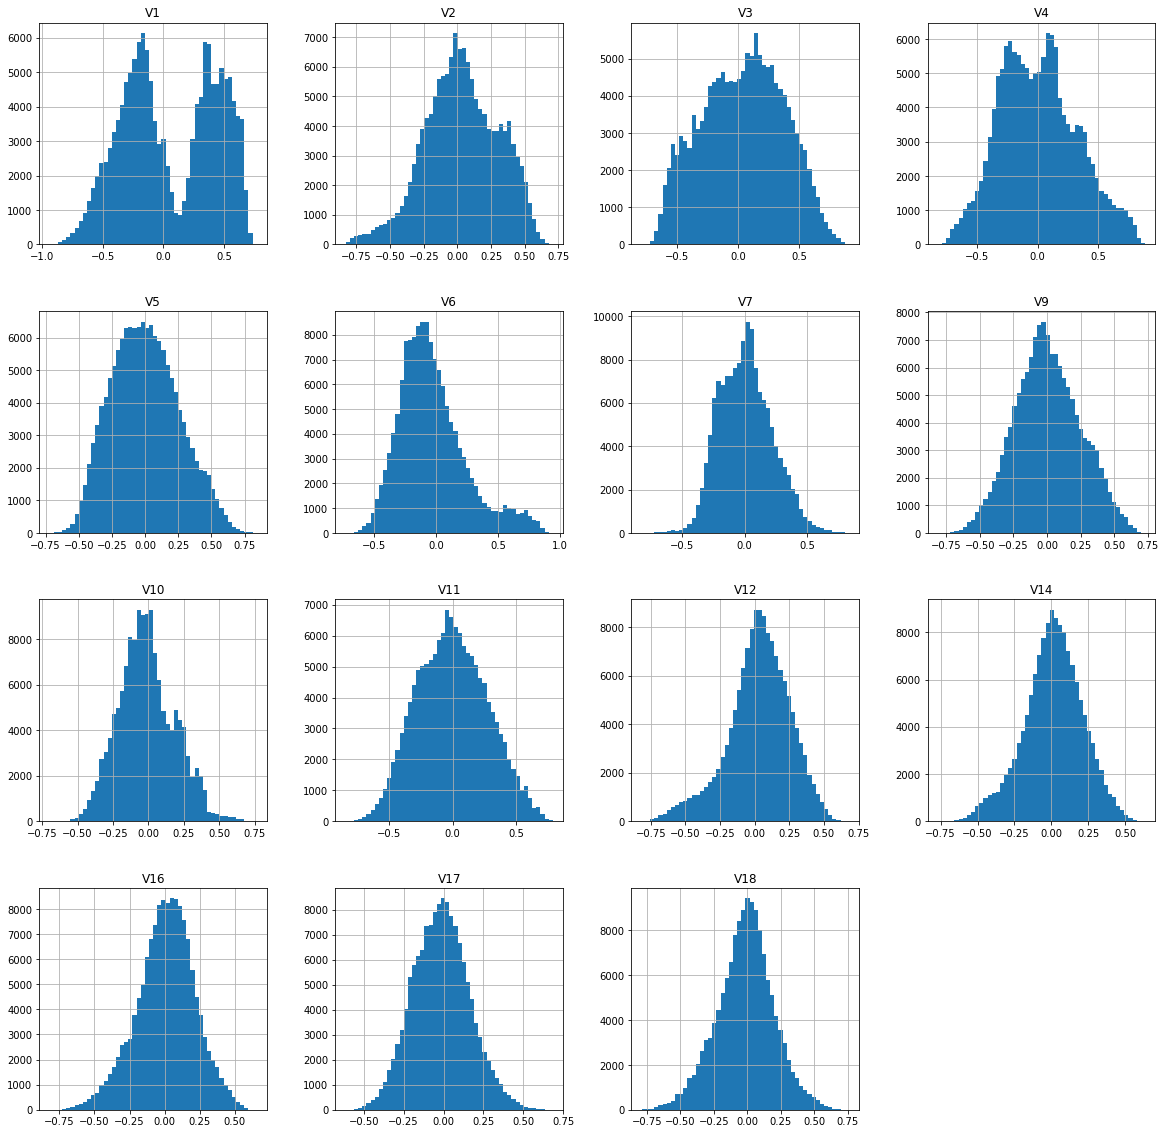

In [ ]:
pred_x.hist(bins=50, figsize=(20,20))
plt.show()

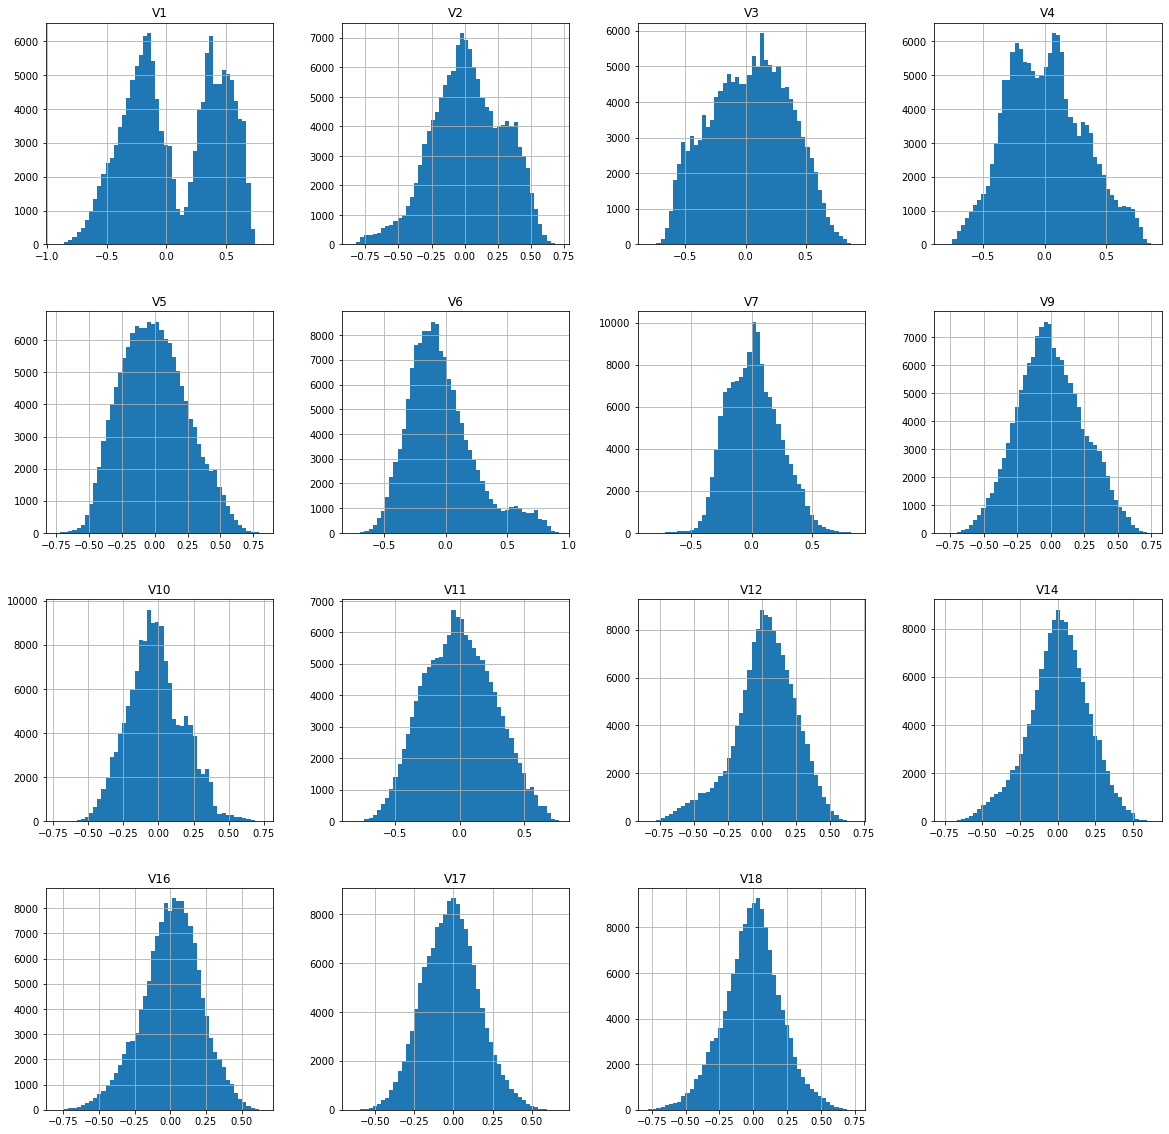

In [ ]:
test_df_scaled.hist(bins=50, figsize=(20,20))
plt.show()

+ 리더보드: 0.9019219415